# Spray Glider Data Visualization 

**Purpose**: Code for exploring the Spray glider data set

**Luke Colosi | lcolosi@ucsd.edu**

Force matplotlib plots to display directly within the output cell of the notebook: 

In [1]:
%matplotlib inline

Import python libraries

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from datetime import datetime
import pandas as pd
import cartopy.crs as ccrs
import sys
import matplotlib 

Set path to access python functions

In [3]:
sys.path.append("../tools/")

Import my functions

In [4]:
import cartopy_figs as cart

Set data analysis parameters

In [5]:
year      = '2023'    # Year to analyze 
month     = '10'      # Month to analyze
depth_lim = 200       # Lower bound of depth 

Set the path to netcdf data I want to read with the netcdf4 function:

In [6]:
PATH = "/Users/lukecolosi/Desktop/projects/graduate_research/Gille_lab/AirSeaCoupling"
filename = PATH + "/data/spray_gliders/CUGN_line_80.nc"

Open netcdf file with Dataset( ) function and with read mode only with the 'r' flag.

In [7]:
nc = Dataset(filename, 'r')

Print key variables

In [8]:
variable_names = nc.variables.keys()
print(variable_names)

dict_keys(['profile', 'mission_name', 'depth', 'lat', 'lon', 'lat_uv', 'lon_uv', 'u_depth_mean', 'v_depth_mean', 'temperature', 'salinity', 'chlorophyll_a', 'u', 'v', 'acoustic_backscatter', 'time', 'time_uv', 'acoustic_backscatter_flag', 'doxy', 'mission', 'mission_profile', 'trajectory_index'])


Print variable attributes

In [9]:
# Loop through each variable 
for variable_name in variable_names:

    # Print variable name
    print(variable_name)

    # Get the name of the ith variable
    variable = nc.variables[variable_name]

    for at in variable.ncattrs():
        print("%s : %s" %(at, nc.variables[variable_name].getncattr(at)))

    
    # Print 
    print("-------------------")

profile
cf_role : profile_id
-------------------
mission_name
long_name : Mission name of each trajectory.
comment : Mission name correlates to the variable trajectory_index.
-------------------
depth
long_name : Depth
positive : down
standard_name : depth
units : m
coverage_content_type : coordinate
-------------------
lat
_FillValue : nan
long_name : Latitude
standard_name : latitude
units : degrees_north
coverage_content_type : coordinate
comment : The estimated latitude of the midpoint of the profile.
For a glider profiling continuously, this latitude is 3/4 of the way between GPS fixes at the beginning and end of dives.  This is the latitude to use with the temperature and salinity variables, which are measured on the ascent only.
-------------------
lon
_FillValue : nan
long_name : Longitude
standard_name : longitude
units : degrees_east
coverage_content_type : coordinate
comment : The estimated longitude of the midpoint of the profile.
For a glider profiling continuously, this l

Read in data into two xarray datasets for sea state and current variables

In [10]:
# Read in dataset with all variables
ds = xr.open_dataset(filename)

# Split data set into two data sets

#--- Sea State ---# 
variables = [
    'temperature',
    'salinity',
    'chlorophyll_a',
    'doxy',
    'u',
    'v',
]
ds_ss = ds[variables]

#--- Current ---# 
variables = [
    'u_depth_mean',
    'v_depth_mean',
]
ds_c = ds[variables]

Change the profile coordinate to time 

In [11]:
#--- Sea State ---# 
ds_ss.coords['profile'] = ds_ss.time
ds_ss = ds_ss.rename({'profile': 'time_n'})
#ds_ss.coords

#--- Current ---# 
ds_c.coords['profile'] = ds_c.time_uv
ds_c = ds_c.rename({'profile': 'time_n'})
#ds_c.coords


Plot full time series of sea state and current variables

In [12]:
# Set plotting parameters
plt.rcParams['text.usetex'] = True
levels_temp = np.arange(3,24,1)
levels_sal  = np.arange(32.4,34.8,0.1)
time_i = datetime.strptime(ds.time_coverage_start, '%Y-%m-%dT%H:%M:%SZ')
time_f = datetime.strptime(ds.time_coverage_end, '%Y-%m-%dT%H:%M:%SZ')

# Create a figure with subplots
fig, axes = plt.subplots(2,1)

# Set the figure size using set_size_inches
fig.set_size_inches(10, 5) 

#--- Temperature ---# 
ds_ss.temperature.plot.contourf(ax=axes[0],yincrease=False,cmap='RdYlBu_r',levels=levels_temp,cbar_kwargs={'label': r'Temperature ($^\circ$C)'})

# Set axis attributes
axes[0].set_xlabel("")
axes[0].set_ylabel("Depth (m)")
axes[0].set_xlim(time_i, time_f)
axes[0].set_ylim(ds.depth[-1],ds.depth[0])

#--- Salinity ---# 
ds_ss.salinity.plot.contourf(ax=axes[1],yincrease=False,cmap='PRGn_r',levels=levels_sal,cbar_kwargs={'label': 'Salinity (psu)'})

# Set axis attributes
axes[1].set_xlabel("Time (years)")
axes[1].set_ylabel("Depth (m)")
axes[1].set_xlim(time_i, time_f)
axes[1].set_ylim(ds.depth[-1],ds.depth[0])

# Display figure
plt.show()

# Save figure 
fig.savefig(fname = PATH + '/figs/spray_glider/overview_line80/temp_sal_profiles_full_ts', bbox_inches = 'tight', dpi=300)

FileNotFoundError: Matplotlib's TeX implementation searched for a file named 'cmss10.tfm' in your texmf tree, but could not find it

<Figure size 1000x500 with 4 Axes>

FileNotFoundError: Matplotlib's TeX implementation searched for a file named 'cmss10.tfm' in your texmf tree, but could not find it

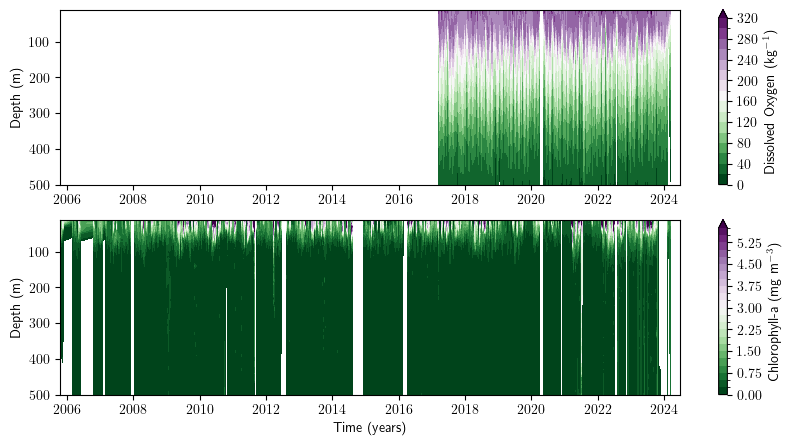

In [13]:
# Set plotting parameters
plt.rcParams['text.usetex'] = True
levels_doxy = np.arange(0,340,20)
levels_chl  = np.arange(0,6,0.25)
time_i = datetime.strptime(ds.time_coverage_start, '%Y-%m-%dT%H:%M:%SZ')
time_f = datetime.strptime(ds.time_coverage_end, '%Y-%m-%dT%H:%M:%SZ')

# Create a figure with subplots
fig, axes = plt.subplots(2,1)

# Set the figure size using set_size_inches
fig.set_size_inches(10, 5) 

#--- Temperature ---# 
ds_ss.doxy.plot.contourf(ax=axes[0],yincrease=False,cmap='PRGn_r',levels=levels_doxy,cbar_kwargs={'label': r'Dissolved Oxygen (kg$^{-1}$)'})

# Set axis attributes
axes[0].set_xlabel("")
axes[0].set_ylabel("Depth (m)")
axes[0].set_xlim(time_i, time_f)
axes[0].set_ylim(ds.depth[-1],ds.depth[0])

#--- Salinity ---# 
ds_ss.chlorophyll_a.plot.contourf(ax=axes[1],yincrease=False,cmap='PRGn_r',levels=levels_chl,cbar_kwargs={'label': 'Chlorophyll-a (mg m$^{-3}$)'})

# Set axis attributes
axes[1].set_xlabel("Time (years)")
axes[1].set_ylabel("Depth (m)")
axes[1].set_xlim(time_i, time_f)
axes[1].set_ylim(ds.depth[-1],ds.depth[0])

# Display figure
plt.show()

# Save figure 
fig.savefig(fname = PATH + '/figs/spray_glider/overview_line80/doxy_chl_profiles_full_ts', bbox_inches = 'tight', dpi=300)

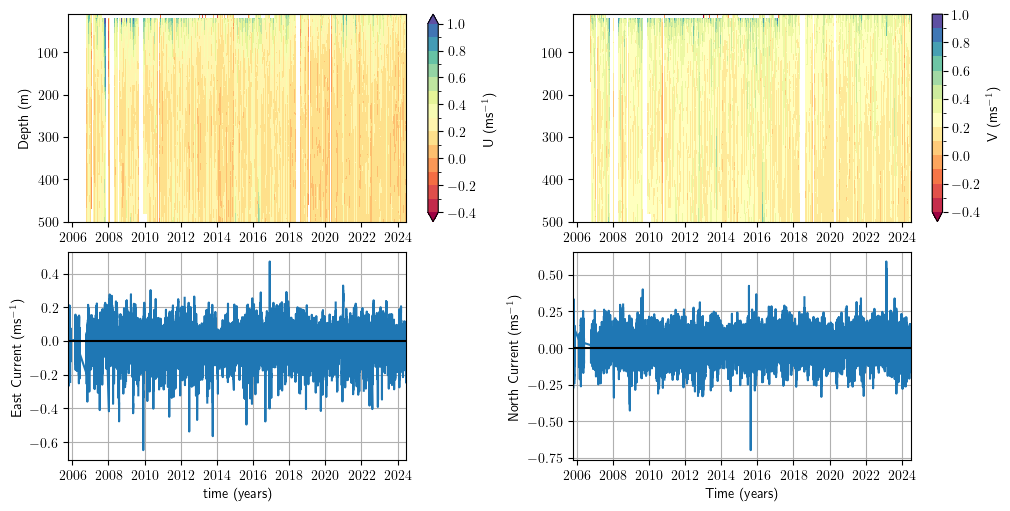

In [14]:
# Set plotting parameters
step = 0.1
levels_u = np.arange(-0.4,1 + step,step)
levels_v  = np.arange(-0.4,1 + step,step)

# Create a figure with subplots
fig, axes = plt.subplots(2,2, constrained_layout=True)

# Set the figure size using set_size_inches
fig.set_size_inches(10, 5) 

#--- U Velocity ---# 
ds_ss.u.plot.contourf(ax=axes[0,0],yincrease=False,cmap='Spectral',levels=levels_u,cbar_kwargs={'label': r'U (ms$^{-1}$)'})

# Set axis attributes
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Depth (m)")
axes[0,0].set_xlim(time_i, time_f)
axes[0,0].set_ylim(ds.depth[-1],ds.depth[0])

#--- U Velocity depth mean ---# 
ds_c.u_depth_mean.plot(ax=axes[1,0])
axes[1,0].axhline(y = 0, color = 'k', linestyle = '-') 

# Set axis attributes
axes[1,0].set_ylabel(r"East Current (ms$^{-1}$)")

# Set axis attributes
axes[1,0].set_xlabel("time (years)")
axes[1,0].set_ylabel(r"East Current (ms$^{-1}$)")
axes[1,0].set_xlim(time_i, time_f)
axes[1,0].grid()

#--- V Velocity ---# 
ds_ss.v.plot.contourf(ax=axes[0,1],yincrease=False,cmap='Spectral',levels=levels_v,cbar_kwargs={'label': r'V (ms$^{-1}$)'})

# Set axis attributes
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
axes[0,1].set_xlim(time_i, time_f)
axes[0,1].set_ylim(ds.depth[-1],ds.depth[0])

#--- V Velocity depth mean ---# 
ds_c.v_depth_mean.plot(ax=axes[1,1])
axes[1,1].axhline(y = 0, color = 'k', linestyle = '-') 

# Set axis attributes
axes[1,1].set_xlabel("Time (years)")
axes[1,1].set_ylabel(r"North Current (ms$^{-1}$)")
axes[1,1].set_xlim(time_i, time_f)
axes[1,1].grid()

# Display figure
plt.show()

# Save figure 
fig.savefig(fname = PATH + '/figs/spray_glider/overview_line80/uv_profiles_full_ts', bbox_inches = 'tight', dpi=300)

Load bathymetry data and extract variables 

In [15]:
# Load bathymetry data 
filename = PATH + "/data/bathymetry/topo_25.1.nc"
ds_bathy = xr.open_dataset(filename)

# Extract data variables
lon_b = ds_bathy["lon"]  # Longitude
lat_b = ds_bathy["lat"]  # Latitude
bathy = ds_bathy["z"]    # Elevation/Bathymetry


Now, lets look at just the top 200 meters for a single year

In [16]:
# Set limits from depth and time 
depth_start = 0
depth_stop  = depth_lim
time_start  =  np.datetime64(year + '-01-01T00:00:00', 'ns')
time_stop   =  np.datetime64( year + '-12-31T23:59:59', 'ns')

ds_ss_surface = ds_ss.sel(depth=slice(depth_start,depth_stop)) #,time_n=slice(time_start,time_stop)


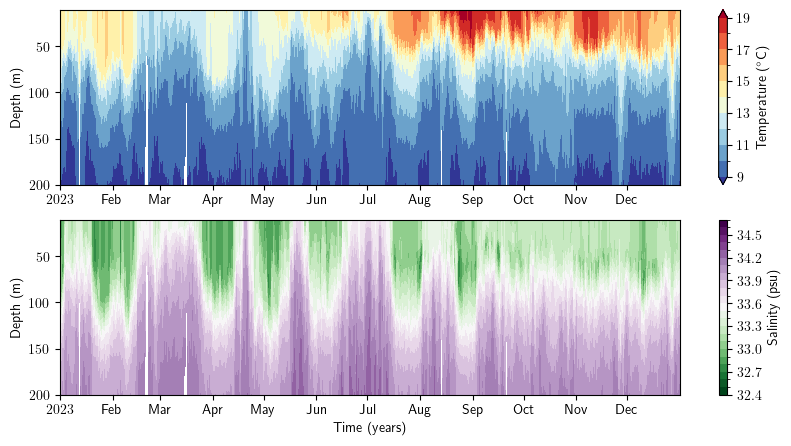

In [17]:
# Set plotting parameters
levels_temp = np.arange(9,20,1)
levels_sal  = np.arange(32.4,34.8,0.1)

# Create a figure with subplots
fig, axes = plt.subplots(2,1)

# Set the figure size using set_size_inches
fig.set_size_inches(10, 5) 

#--- Temperature ---# 
ds_ss_surface.temperature.plot.contourf(ax=axes[0],yincrease=False,cmap='RdYlBu_r',levels=levels_temp,cbar_kwargs={'label': r'Temperature ($^\circ$C)'})

# Set axis attributes
axes[0].set_xlabel("")
axes[0].set_ylabel("Depth (m)")
axes[0].set_xlim(time_start, time_stop)
axes[0].set_ylim(ds_ss_surface.depth[-1],ds_ss_surface.depth[0])

#--- Salinity ---# 
ds_ss_surface.salinity.plot.contourf(ax=axes[1],yincrease=False,cmap='PRGn_r',levels=levels_sal,cbar_kwargs={'label': 'Salinity (psu)'})

# Set axis attributes
axes[1].set_xlabel("Time (years)")
axes[1].set_ylabel("Depth (m)")
axes[1].set_xlim(time_start, time_stop)
axes[1].set_ylim(ds_ss_surface.depth[-1],ds_ss_surface.depth[0])

# Display figure
plt.show()

# Save figure 
fig.savefig(fname = PATH + '/figs/spray_glider/overview_line80/temp_sal_profiles_' + year + '_top' + str(depth_lim) + '_ts', bbox_inches = 'tight', dpi=300)

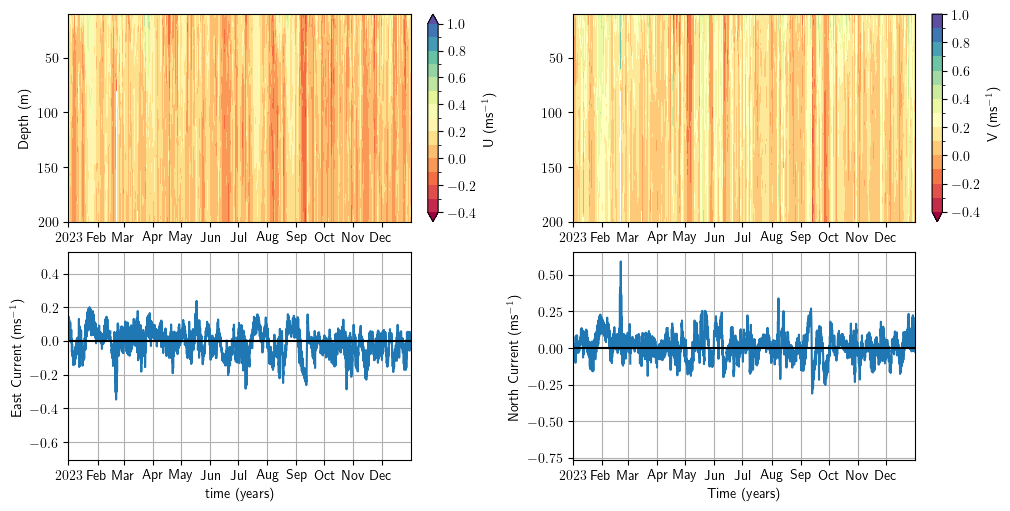

In [18]:
# Set plotting parameters
step = 0.1
levels_u = np.arange(-0.4,1 + step,step)
levels_v  = np.arange(-0.4,1 + step,step)

# Create a figure with subplots
fig, axes = plt.subplots(2,2, constrained_layout=True)

# Set the figure size using set_size_inches
fig.set_size_inches(10, 5) 

#--- U Velocity ---# 
ds_ss_surface.u.plot.contourf(ax=axes[0,0],yincrease=False,cmap='Spectral',levels=levels_u,cbar_kwargs={'label': r'U (ms$^{-1}$)'})

# Set axis attributes
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Depth (m)")
axes[0,0].set_xlim(time_start, time_stop)
axes[0,0].set_ylim(ds_ss_surface.depth[-1],ds_ss_surface.depth[0])

#--- U Velocity depth mean ---# 
ds_c.u_depth_mean.plot(ax=axes[1,0])
axes[1,0].axhline(y = 0, color = 'k', linestyle = '-') 

# Set axis attributes
axes[1,0].set_xlabel("time (years)")
axes[1,0].set_ylabel(r"East Current (ms$^{-1}$)")
axes[1,0].set_xlim(time_start, time_stop)
axes[1,0].grid()

#--- V Velocity ---# 
ds_ss_surface.v.plot.contourf(ax=axes[0,1],yincrease=False,cmap='Spectral',levels=levels_v,cbar_kwargs={'label': r'V (ms$^{-1}$)'})

# Set axis attributes
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
axes[0,1].set_xlim(time_start, time_stop)
axes[0,1].set_ylim(ds_ss_surface.depth[-1],ds_ss_surface.depth[0])

#--- V Velocity depth mean ---# 
ds_c.v_depth_mean.plot(ax=axes[1,1])
axes[1,1].axhline(y = 0, color = 'k', linestyle = '-') 

# Set axis attributes
axes[1,1].set_xlabel("Time (years)")
axes[1,1].set_ylabel(r"North Current (ms$^{-1}$)")
axes[1,1].set_xlim(time_start, time_stop)
axes[1,1].grid()

# Display figure
plt.show()

# Save figure 
fig.savefig(fname = PATH + '/figs/spray_glider/overview_line80/uv_profiles_' + year + '_top' + str(depth_lim) + '_ts', bbox_inches = 'tight', dpi=300)

Now, we will look at the trajectory of the glider for 2016. Before doing that, I am going to break up the data structure into individual numpy arrays

In [19]:
#--- Cordinates ---# 
profile = nc.variables['profile'][:]
depth   = nc.variables['depth'][:]

#--- Space and time coordinates ---# 
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]
lon_uv = nc.variables['lon_uv'][:]
lat_uv = nc.variables['lat_uv'][:]
time =  num2date(nc.variables['time'][:], nc.variables['time'].units)
time_uv =  num2date(nc.variables['time_uv'][:], nc.variables['time_uv'].units)

#--- Physical Parameters ---# 
temperature = nc.variables['temperature'][:]
salinity = nc.variables['salinity'][:]
chla = nc.variables['chlorophyll_a'][:]
doxy = nc.variables['doxy'][:]
u = nc.variables['u'][:]
v = nc.variables['v'][:]

/Users/lukecolosi/opt/anaconda3/envs/airsea_coupling/lib/python3.12/site-packages/numpy/ma/core.py:467: RuntimeWarning: invalid value encountered in cast
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)


Grab time, lat, and lon data from a specified time intervals  

In [20]:
# Grab indices of masked elements 
time_mask = np.array(np.where(time.mask))
lon_mask  = np.array(np.where(lon.mask))
lat_mask  = np.array(np.where(lat.mask))

# Check if the masked elements in time, lon, and lat 
if (time_mask == lon_mask).all() and (time_mask == lat_mask).all() and (lon_mask == lat_mask).all():

    # Removed Masked values 
    time_cn = time.compressed()
    lon_cn  = lon.compressed()
    lat_cn  = lat.compressed()

    # Grab the years from the cleaned time array 
    years = np.array([y.year for y in time_cn])

    # Grab time steps from the desired year of analysis
    year_idx = np.nonzero(years == int(year))
    time_yr  = time_cn[year_idx]
    lon_yr   = lon_cn[year_idx]
    lat_yr   = lat_cn[year_idx]

else:

    # Print warning statement for incompatible time, lon, and lat masks
    print('Time, lon, and lat masks are inconsistent!')
 


Plot the trajectory of the glider as a function of time

/Users/lukecolosi/opt/anaconda3/envs/airsea_coupling/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)


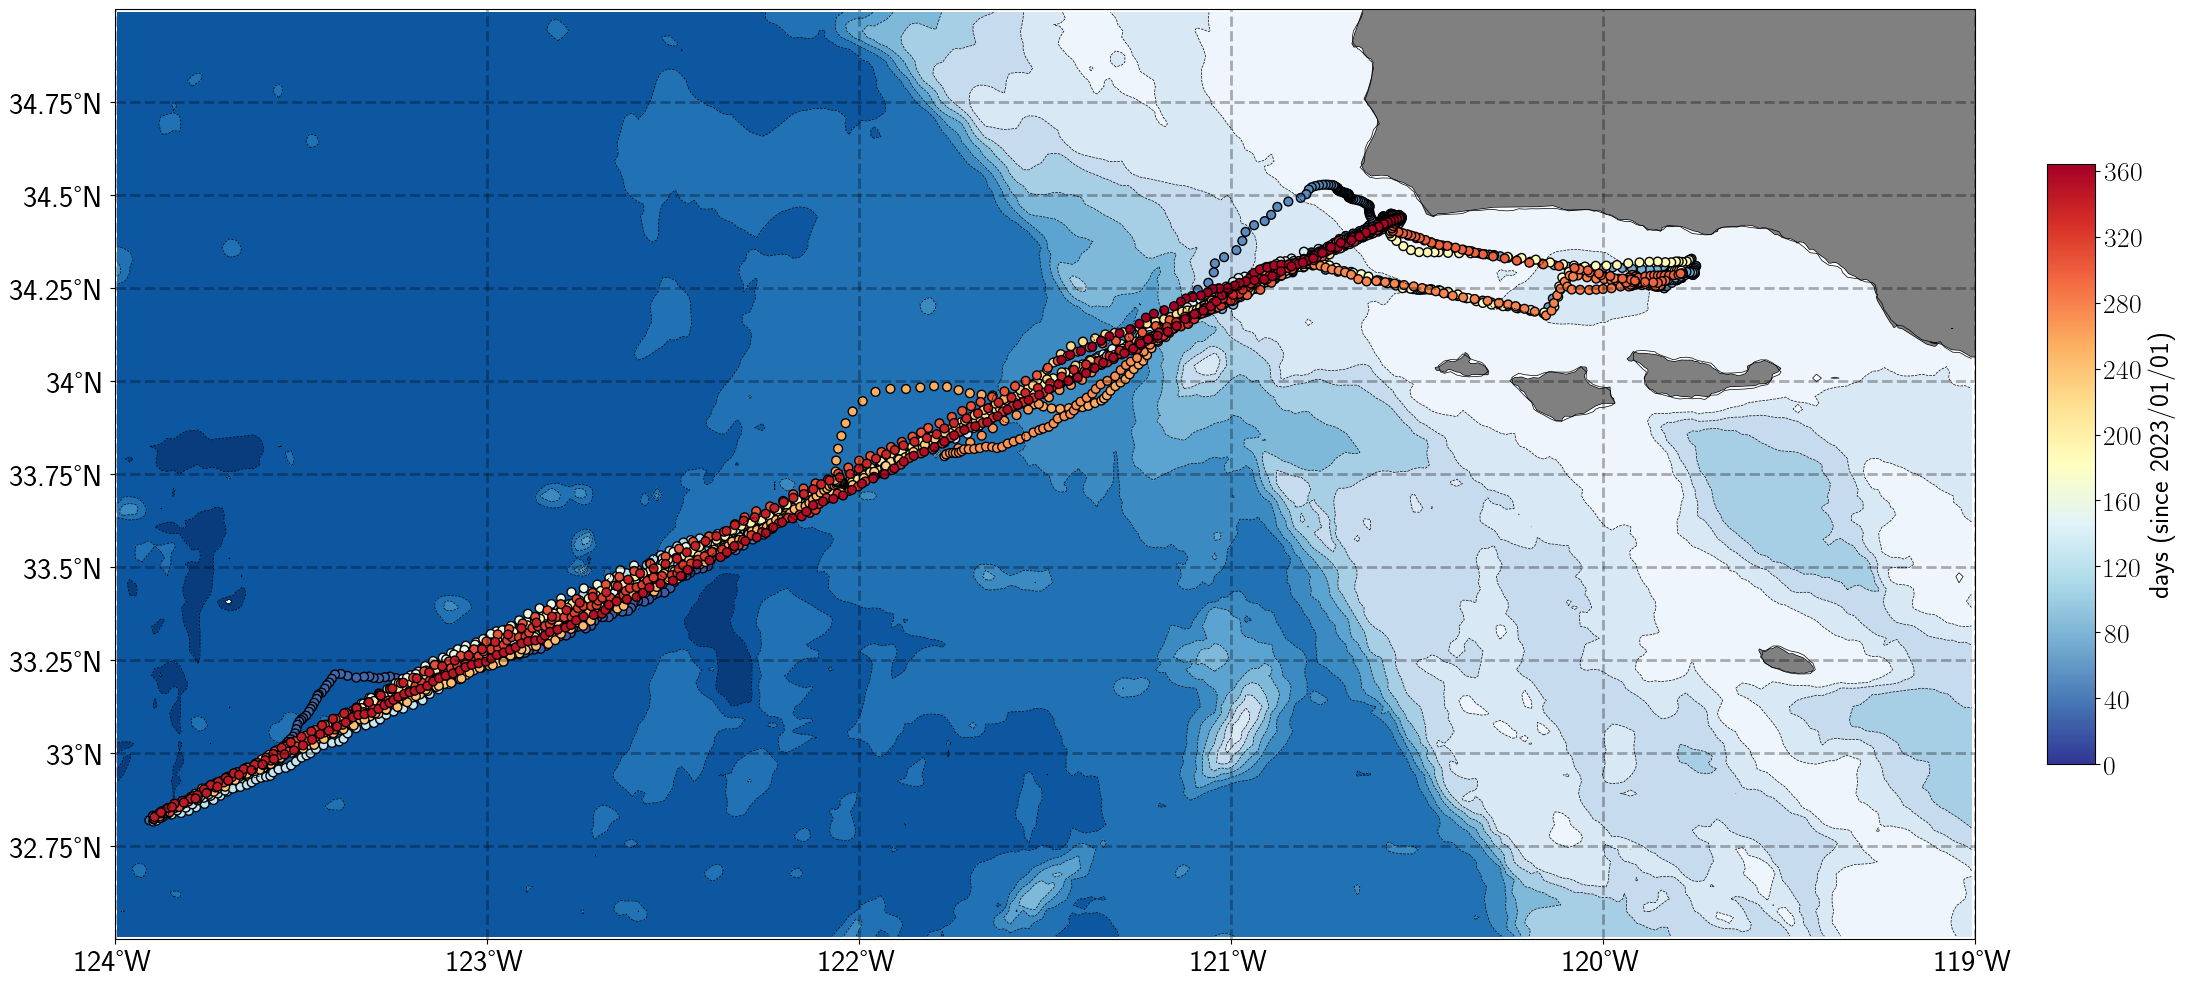

In [21]:
# Create pandas data frame
data = {
    'lon': lon_yr, 
    'lat': lat_yr,
    'time': time_yr
}
df = pd.DataFrame(data)

# Convert cftime.DatetimeGregorian to Python datetime and calculate days since 2016-01-01
reference_date = datetime(int(year),1,1)
df['days'] = [ (datetime(t.year, t.month, t.day) - reference_date).days for t in df['time']]

# Set plotting parameters
projection = ccrs.PlateCarree(central_longitude=0.0)
xticks = [-124, -123, -122, -121, -120, -119]
yticks = [32.75, 33.00, 33.25, 33.50, 33.75, 34.00, 34.25, 34.50, 34.75,]
resolution = "10m"
cmap = plt.get_cmap('RdYlBu_r') 
bounds = np.arange(0,360+40,40)
lon_min = -124
lon_max = -119
lat_min = 32.50
lat_max = 35
levels = np.arange(-5000,0+500,500)

# Extract data from bathymetry 
lon_grid = lon_b[(lon_b >= lon_min) & (lon_b <= lon_max)]
lat_grid = lat_b[(lat_b >= lat_min) & (lat_b <= lat_max)]
bathy_grid   = bathy[(lat_b >= lat_min) & (lat_b <= lat_max),(lon_b >= lon_min) & (lon_b <= lon_max)]

# Create figure
fig, axes = plt.subplots(1, 1, figsize=(24, 20), subplot_kw={"projection": projection})

# Set figure axes 
cart.set_subplots(axes, projection, resolution, lon_min=-124, lon_max=-119, lat_min=32.50, lat_max=35) # , lat_min=32.75, lat_max=34.50

# Plot the bathymetry 
mesh = axes.contourf(
    lon_grid, lat_grid, bathy_grid, levels=levels,
    transform=ccrs.PlateCarree(),
    cmap="Blues_r",  
    shading="auto"
)

# Add contour lines
contours = axes.contour(lon_grid, lat_grid, bathy_grid,levels=levels, colors='black', linewidths=0.5)

# # Add labels to contour lines
# axes.clabel(contours, inline=True, fontsize=8)

# Plot trajectory of glider
sc = axes.scatter(df['lon'],df['lat'],c=df['days'],cmap='RdYlBu_r',s=40,edgecolor='k',marker='o')

# Set grid ticks 
cart.set_grid_ticks(
    axes,
    projection=ccrs.PlateCarree(),
    xticks=xticks,
    yticks=yticks,
    xlabels=True,
    ylabels=True,
    grid=True,
    fontsize=22,
    color="black",
)

# Create colormap
cax = plt.axes([0.93, 0.35, 0.02, 0.3])
cart.set_cbar(
    sc,
    cax,
    fig,
    orientation="vertical",
    extend="neither",
    cbar_label="days (since " + year + "/01/01)",
    nbins=10,
    fontsize=20,
    cbar_ticks=[],
    task="regular",
)

# Display figure
plt.show()

# Save figure 
fig.savefig(fname = PATH + '/figs/spray_glider/overview_line80/time_' + year + '_trajectory', bbox_inches = 'tight', dpi=300)

Now, plot the temperature and salinity geospatially

/Users/lukecolosi/opt/anaconda3/envs/airsea_coupling/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)


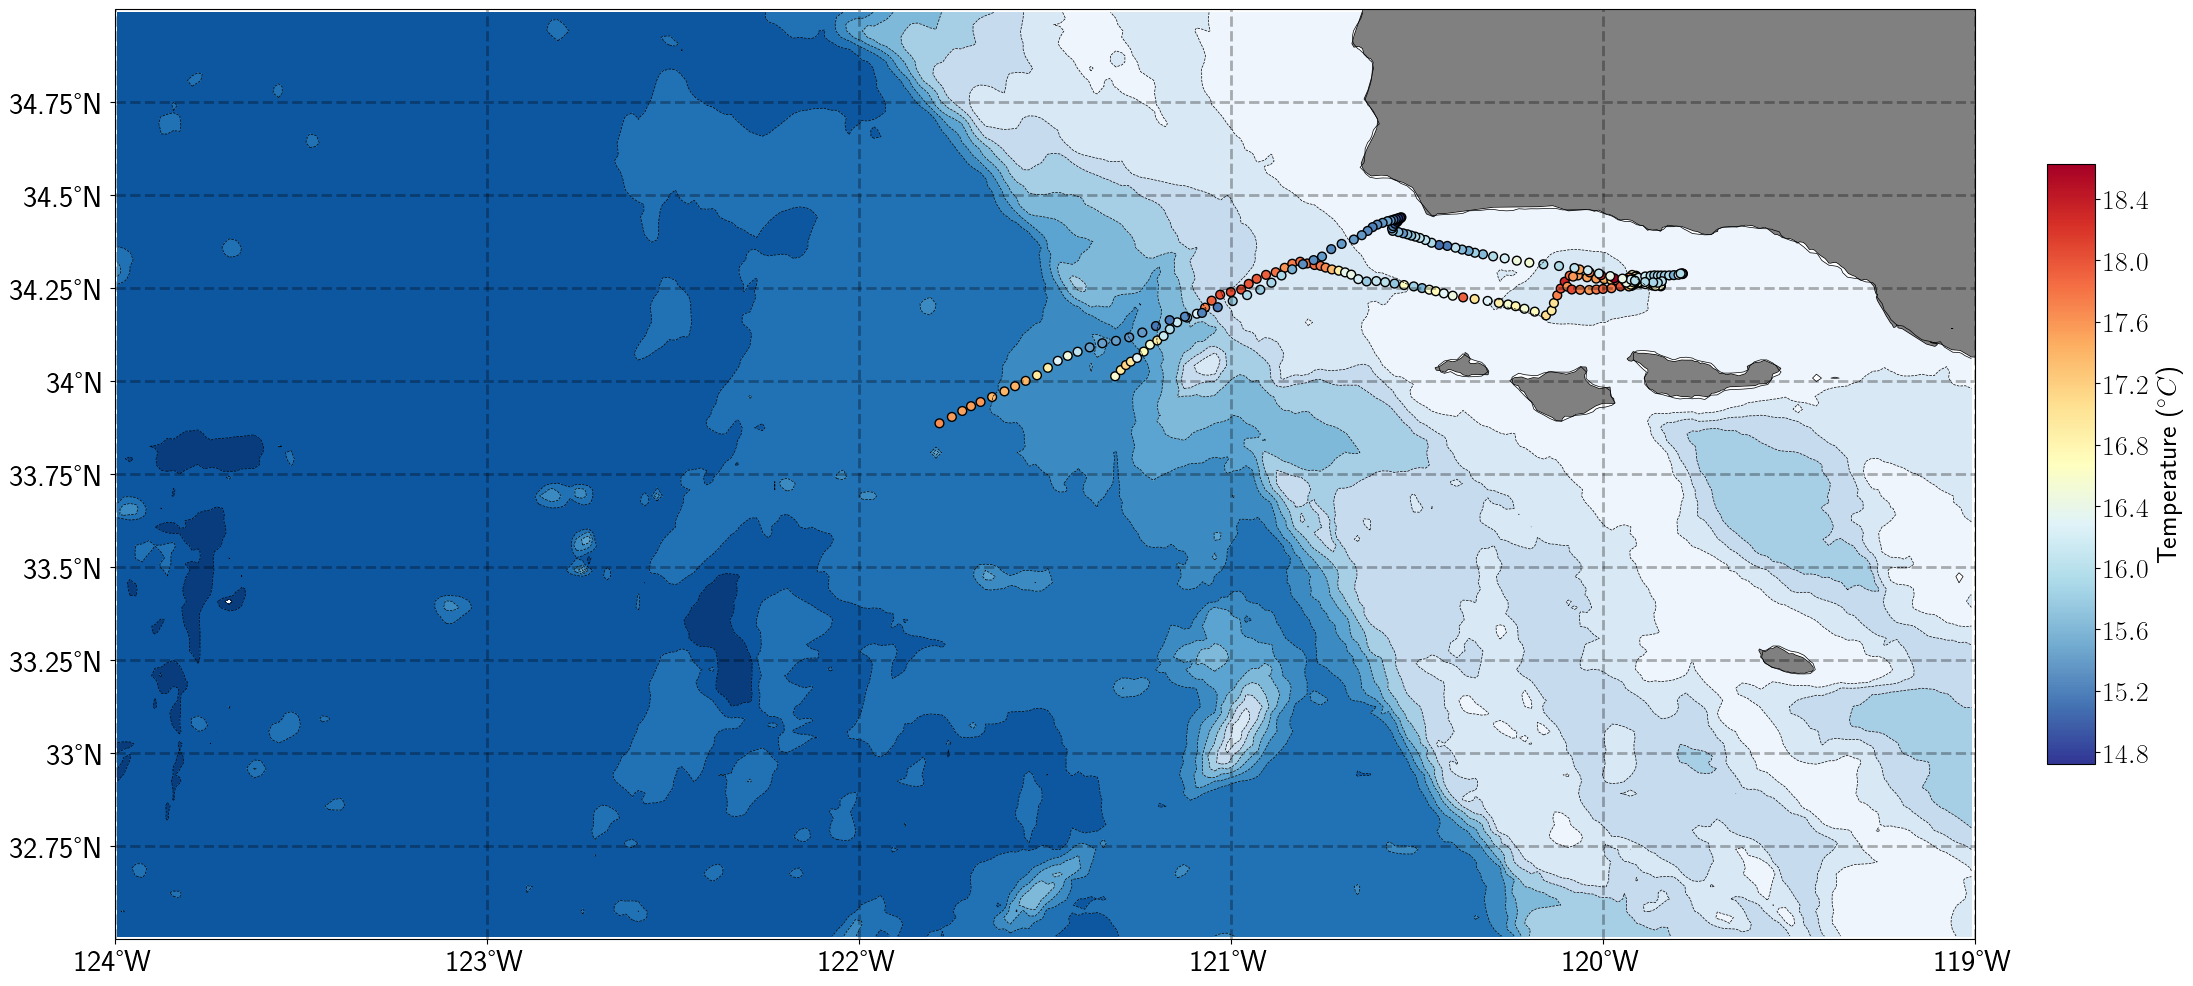

In [22]:
# Grab temperature, salinity, horizontal velocities from a given depth 
depth_bin = depth[0]
temperature_dp = temperature[depth == depth_bin,:].T.squeeze()
salinity_dp = salinity[depth == depth_bin,:].T.squeeze()
u_dp = u[depth == depth_bin,:].T.squeeze()
v_dp = v[depth == depth_bin,:].T.squeeze()

# Check if the masked elements in time, lon, and lat 
if (time_mask == lon_mask).all() and (time_mask == lat_mask).all() and (lon_mask == lat_mask).all():

    # Combine masks from time and temperature 
    temp_mask = np.logical_or(temperature_dp.mask,time.mask)

    # Mask temperature, time, lon, and lat on the new mask 
    temp_m = np.ma.masked_where(temp_mask,temperature_dp)
    time_m = np.ma.masked_where(temp_mask,time)
    lon_m  = np.ma.masked_where(temp_mask,lon)
    lat_m  = np.ma.masked_where(temp_mask,lat)

    # Removed Masked values 
    temp_m_cn = temp_m.compressed()
    time_m_cn = time_m.compressed()
    lon_m_cn  = lon_m.compressed()
    lat_m_cn  = lat_m.compressed()

    # Grab the years from the cleaned time array 
    years  = np.array([y.year for y in time_m_cn])
    months = np.array([m.month for m in time_m_cn])

    # Grab time steps from the desired year of analysis
    year_idx    = years == int(year) #np.nonzero(years == int(year))
    month_idx   = months == int(month) # np.nonzero(months == int(month))
    time_idx    = year_idx * month_idx
    temp_m_t   = temp_m_cn[time_idx]
    time_m_t   = time_m_cn[time_idx]
    lon_m_t    = lon_m_cn[time_idx]
    lat_m_t    = lat_m_cn[time_idx]

# Create pandas data frame
data = {
    'lon': lon_m_t, 
    'lat': lat_m_t,
    'time': time_m_t,
    'temp': temp_m_t
}
df = pd.DataFrame(data)

# Convert cftime.DatetimeGregorian to Python datetime and calculate days since 2016-01-01
reference_date = datetime(int(year),1,1)
df['days'] = [ (datetime(t.year, t.month, t.day) - reference_date).days for t in df['time']]

# Set plotting parameters
levels_temp = np.arange(13,18,1)
levels_sal  = np.arange(32.4,34.8,0.1)
bounds = np.arange(15,21+0.5,0.5)

# Create figure
fig, axes = plt.subplots(1, 1, figsize=(24, 20), subplot_kw={"projection": projection})

# Set figure axes 
cart.set_subplots(axes, projection, resolution, lon_min=-124, lon_max=-119, lat_min=32.50, lat_max=35) # , lat_min=32.75, lat_max=34.50

# Plot the bathymetry 
mesh = axes.contourf(
    lon_grid, lat_grid, bathy_grid, levels=levels,
    transform=ccrs.PlateCarree(),
    cmap="Blues_r",  
    shading="auto"
)

# Add contour lines
contours = axes.contour(lon_grid, lat_grid, bathy_grid,levels=levels, colors='black', linewidths=0.5)

# Add labels to contour lines
#axes.clabel(contours, inline=True, fontsize=8)

# Plot trajectory of glider
sc = axes.scatter(df['lon'],df['lat'],c=df['temp'],cmap='RdYlBu_r',s=40,edgecolor='k',marker='o')

# Set grid ticks 
cart.set_grid_ticks(
    axes,
    projection=ccrs.PlateCarree(),
    xticks=xticks,
    yticks=yticks,
    xlabels=True,
    ylabels=True,
    grid=True,
    fontsize=22,
    color="black",
)

# Create colormap
cax = plt.axes([0.93, 0.35, 0.02, 0.3])
cart.set_cbar(
    sc,
    cax,
    fig,
    orientation="vertical",
    extend="neither",
    cbar_label= r"Temperature ($^{\circ}C$)",
    nbins=10,
    fontsize=20,
    cbar_ticks=[],
    task="regular",
)

# Display figure
plt.show()

# Save figure 
fig.savefig(fname = PATH + '/figs/spray_glider/overview_line80/temp_' + year + '_' + month + '_trajectory', bbox_inches = 'tight', dpi=300)



/Users/lukecolosi/opt/anaconda3/envs/airsea_coupling/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)


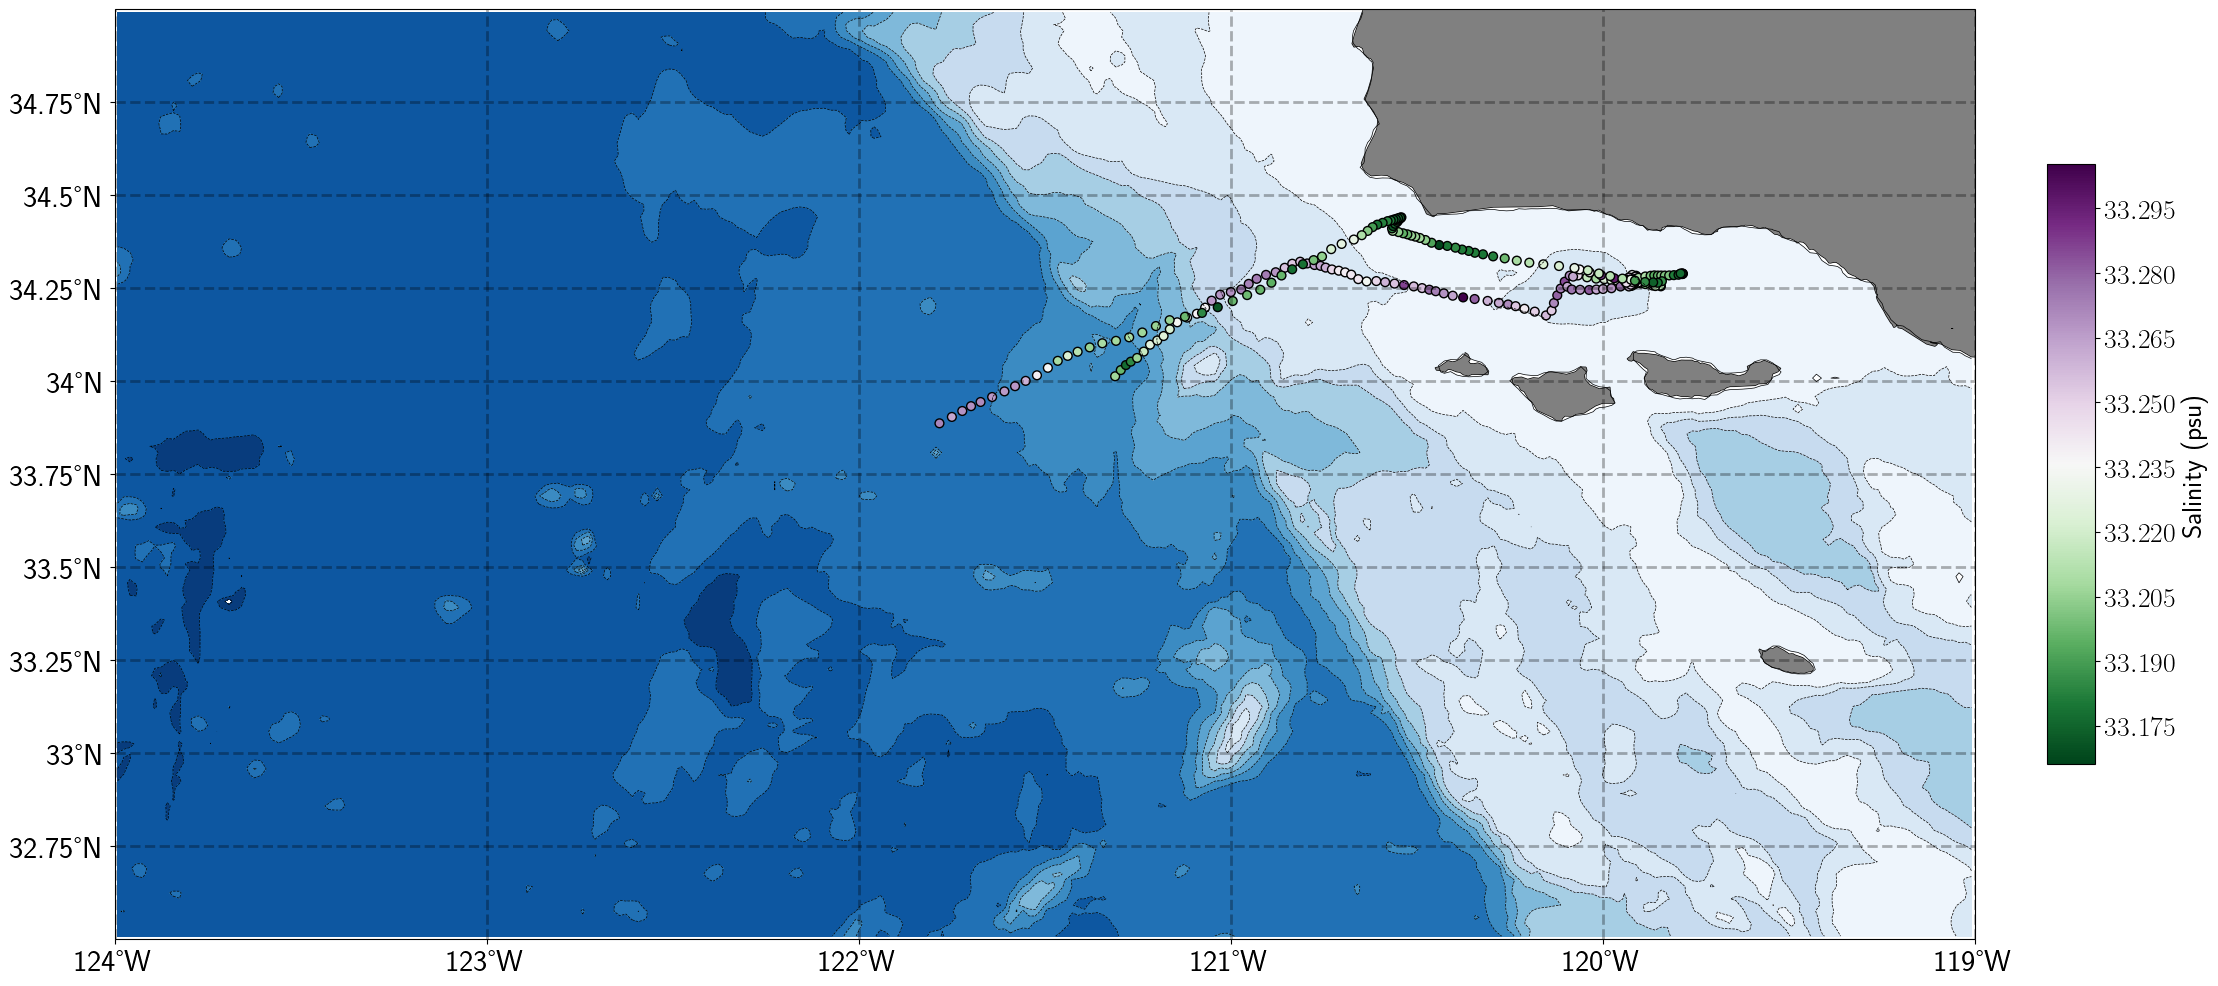

In [23]:
# Grab temperature, salinity, horizontal velocities from a given depth 
depth_bin = depth[0]
salinity_dp = salinity[depth == depth_bin,:].T.squeeze()

# Check if the masked elements in time, lon, and lat 
if (time_mask == lon_mask).all() and (time_mask == lat_mask).all() and (lon_mask == lat_mask).all():

    # Combine masks from time and salinity 
    sal_mask = np.logical_or(salinity_dp.mask,time.mask)

    # Mask temperature, time, lon, and lat on the new mask 
    sal_m = np.ma.masked_where(sal_mask,salinity_dp)
    time_m = np.ma.masked_where(sal_mask,time)
    lon_m  = np.ma.masked_where(sal_mask,lon)
    lat_m  = np.ma.masked_where(sal_mask,lat)

    # Removed Masked values 
    sal_m_cn = sal_m.compressed()
    time_m_cn = time_m.compressed()
    lon_m_cn  = lon_m.compressed()
    lat_m_cn  = lat_m.compressed()

    # Grab the years from the cleaned time array 
    years  = np.array([y.year for y in time_m_cn])
    months = np.array([m.month for m in time_m_cn])

    # Grab time steps from the desired year of analysis
    year_idx    = years == int(year) #np.nonzero(years == int(year))
    month_idx   = months == int(month) # np.nonzero(months == int(month))
    time_idx    = year_idx * month_idx
    sal_m_t   = sal_m_cn[time_idx]
    time_m_t   = time_m_cn[time_idx]
    lon_m_t    = lon_m_cn[time_idx]
    lat_m_t    = lat_m_cn[time_idx]

# Create pandas data frame
data = {
    'lon': lon_m_t, 
    'lat': lat_m_t,
    'time': time_m_t,
    'sal': sal_m_t
}
df = pd.DataFrame(data)

# Convert cftime.DatetimeGregorian to Python datetime and calculate days since 2016-01-01
reference_date = datetime(int(year),1,1)
df['days'] = [ (datetime(t.year, t.month, t.day) - reference_date).days for t in df['time']]

# Set plotting parameters
bounds = np.arange(15,21+0.5,0.5)

# Create figure
fig, axes = plt.subplots(1, 1, figsize=(24, 20), subplot_kw={"projection": projection})

# Set figure axes 
cart.set_subplots(axes, projection, resolution, lon_min=-124, lon_max=-119, lat_min=32.50, lat_max=35) # , lat_min=32.75, lat_max=34.50

# Plot the bathymetry 
mesh = axes.contourf(
    lon_grid, lat_grid, bathy_grid, levels=levels,
    transform=ccrs.PlateCarree(),
    cmap="Blues_r",  
    shading="auto"
)

# Add contour lines
contours = axes.contour(lon_grid, lat_grid, bathy_grid,levels=levels, colors='black', linewidths=0.5)

# Add labels to contour lines
#axes.clabel(contours, inline=True, fontsize=8)

# Plot trajectory of glider
sc = axes.scatter(df['lon'],df['lat'],c=df['sal'],cmap='PRGn_r',s=40,edgecolor='k',marker='o')

# Set grid ticks 
cart.set_grid_ticks(
    axes,
    projection=ccrs.PlateCarree(),
    xticks=xticks,
    yticks=yticks,
    xlabels=True,
    ylabels=True,
    grid=True,
    fontsize=22,
    color="black",
)

# Create colormap
cax = plt.axes([0.93, 0.35, 0.02, 0.3])
cart.set_cbar(
    sc,
    cax,
    fig,
    orientation="vertical",
    extend="neither",
    cbar_label= r"Salinity (psu)",
    nbins=10,
    fontsize=20,
    cbar_ticks=[],
    task="regular",
)

# Display figure
plt.show()

# Save figure 
fig.savefig(fname = PATH + '/figs/spray_glider/overview_line80/sal_' + year + '_' + month + '_trajectory', bbox_inches = 'tight', dpi=300)


/Users/lukecolosi/opt/anaconda3/envs/airsea_coupling/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)


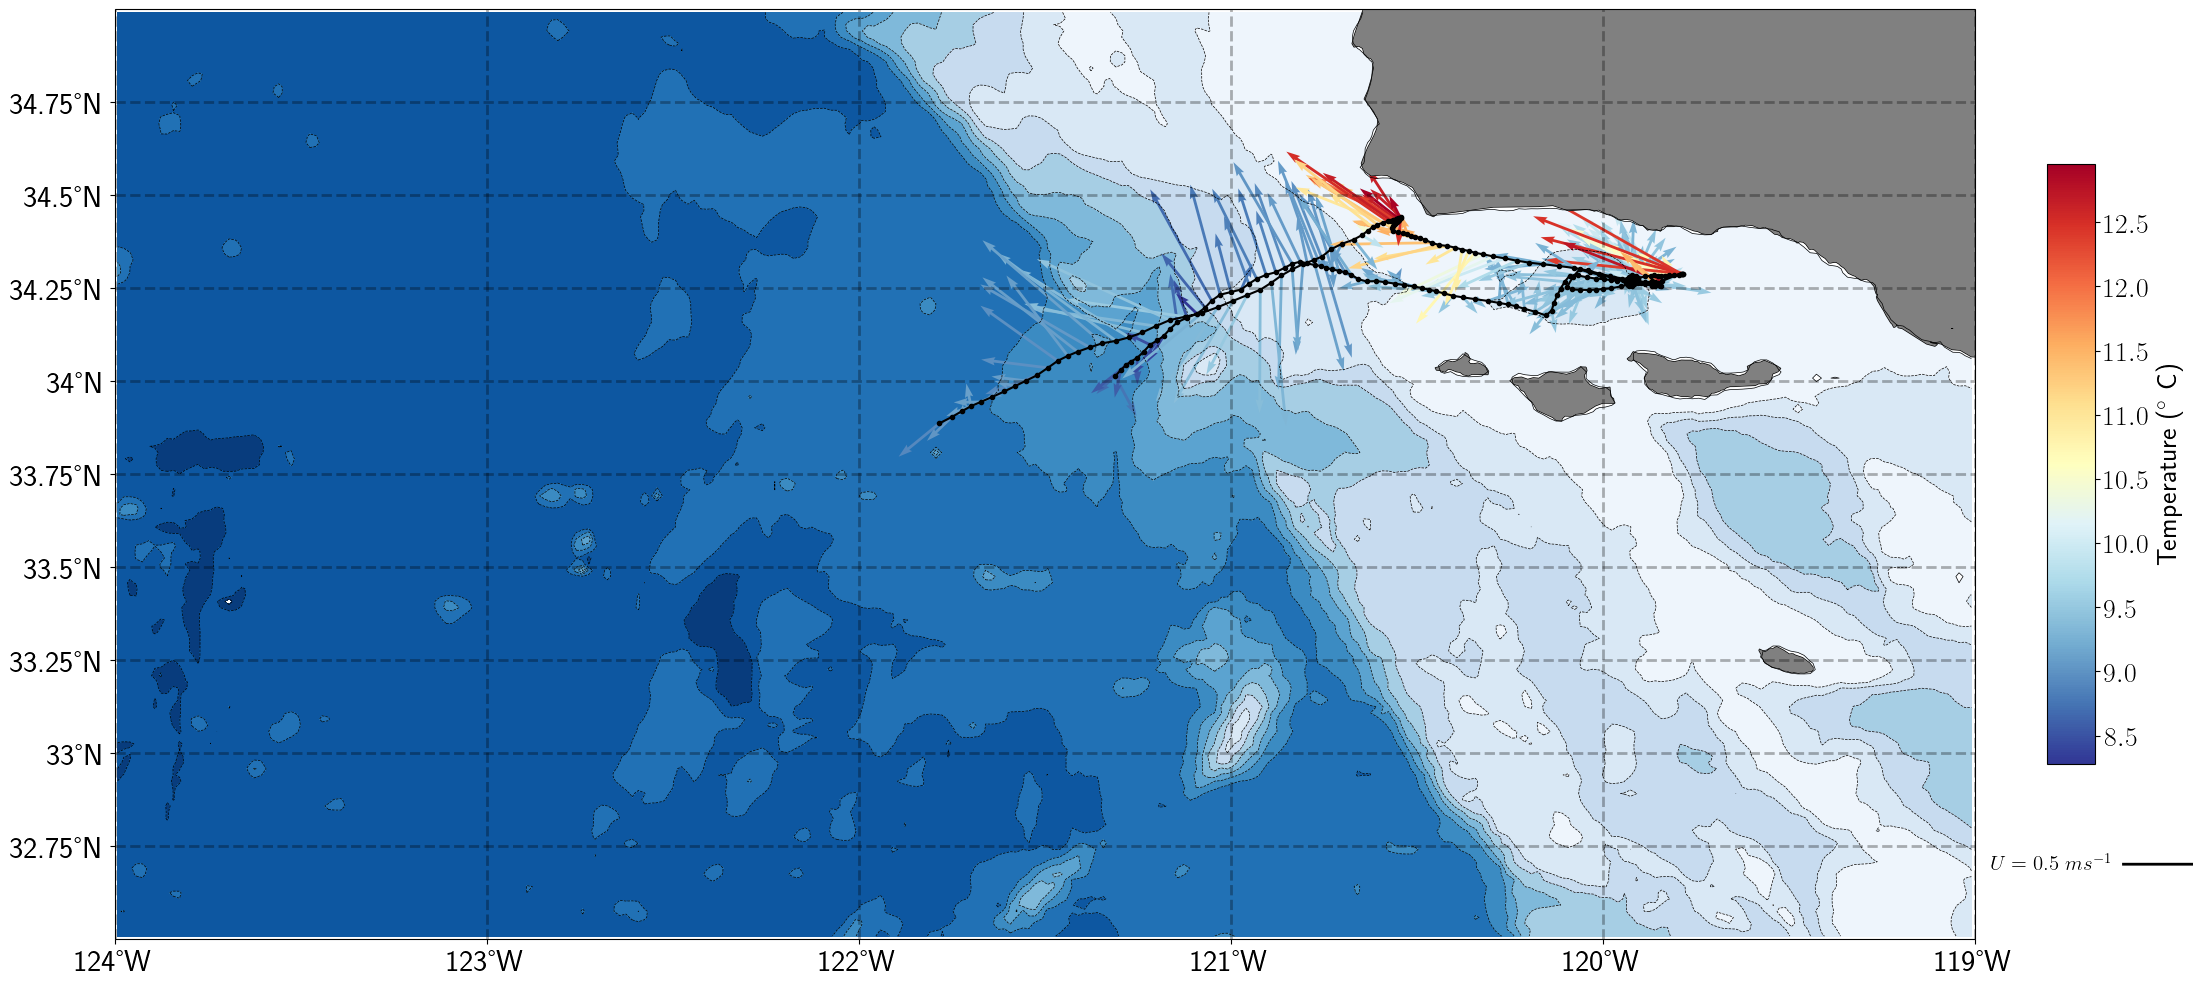

In [24]:
# Grab temperature, salinity, horizontal velocities from a given depth 
depth_bin = depth[-1]
temperature_dp = np.ma.mean(temperature[(depth >= depth[0]) & (depth <= depth_bin),:].T,axis=1)
u_dp = np.ma.mean(u[(depth >= depth[0]) & (depth <= depth_bin),:].T,axis=1)
v_dp = np.ma.mean(v[(depth >= depth[0]) & (depth <= depth_bin),:].T,axis=1)

# Grab the mask of the u and v velocities 
u_dp_mask  = np.array(np.where(u_dp.mask))
v_dp_mask  = np.array(np.where(u_dp.mask))

# Check if the masked elements in time, lon, and lat are the same (as well as the u and v masks are identical)
if (time_mask == lon_mask).all() and (time_mask == lat_mask).all() and (lon_mask == lat_mask).all() and (u_dp_mask == v_dp_mask).all():

    # Combine masks from time and u 
    u_mask = np.logical_or(u_dp.mask,time.mask)

    # Combine maskes for u_mask and temperature
    utemp_mask = np.logical_or(temperature_dp.mask,u_mask)

    # Mask temperature, time, lon, and lat on the new mask 
    u_m = np.ma.masked_where(utemp_mask,u_dp)
    v_m = np.ma.masked_where(utemp_mask,v_dp)
    temp_m = np.ma.masked_where(utemp_mask,temperature_dp)
    time_m = np.ma.masked_where(utemp_mask,time)
    lon_m  = np.ma.masked_where(utemp_mask,lon)
    lat_m  = np.ma.masked_where(utemp_mask,lat)

    # Removed Masked values 
    u_m_cn = u_m.compressed()
    v_m_cn = v_m.compressed()
    temp_m_cn = temp_m.compressed()
    time_m_cn = time_m.compressed()
    lon_m_cn  = lon_m.compressed()
    lat_m_cn  = lat_m.compressed()

    # Grab the years from the cleaned time array 
    years  = np.array([y.year for y in time_m_cn])
    months = np.array([m.month for m in time_m_cn])

    # Grab time steps from the desired year of analysis
    year_idx    = years == int(year) #np.nonzero(years == int(year))
    month_idx   = months == int(month) # np.nonzero(months == int(month))
    time_idx    = year_idx * month_idx
    u_m_t   = u_m_cn[time_idx]
    v_m_t   = v_m_cn[time_idx]
    temp_m_t   = temp_m_cn[time_idx]
    time_m_t   = time_m_cn[time_idx]
    lon_m_t    = lon_m_cn[time_idx]
    lat_m_t    = lat_m_cn[time_idx]

# Create pandas data frame
data = {
    'lon': lon_m_t, 
    'lat': lat_m_t,
    'time': time_m_t,
    'u': u_m_t,
    'v': v_m_t,
    'temp' : temp_m_t
}
df = pd.DataFrame(data)

# Convert cftime.DatetimeGregorian to Python datetime and calculate days since 2016-01-01
reference_date = datetime(int(year),1,1)
df['days'] = [ (datetime(t.year, t.month, t.day) - reference_date).days for t in df['time']]

# Set plotting parameters
bounds = np.arange(-0.4,0.4+0.1,0.1)

# Create figure
fig, axes = plt.subplots(1, 1, figsize=(24, 20), subplot_kw={"projection": projection})

# Set figure axes 
cart.set_subplots(axes, projection, resolution, lon_min=-124, lon_max=-119, lat_min=32.50, lat_max=35) # , lat_min=32.75, lat_max=34.50

# Plot the bathymetry 
mesh = axes.contourf(
    lon_grid, lat_grid, bathy_grid, levels=levels,
    transform=ccrs.PlateCarree(),
    cmap="Blues_r",  
    shading="auto"
)

# Add contour lines
contours = axes.contour(lon_grid, lat_grid, bathy_grid,levels=levels, colors='black', linewidths=0.5)

# Add labels to contour lines
#axes.clabel(contours, inline=True, fontsize=8)

# Plot the trajectory of the glider 
axes.plot(df['lon'],df['lat'],'k.-')

# Plot velocity vectors of glider
qv = axes.quiver(df['lon'],df['lat'],df['u'],df['v'],df['temp'],scale=3,cmap='RdYlBu_r',width=0.0015)

# Add a quiver key for reference velocity
axes.quiverkey(qv, 0.9615, 0.3, 0.5, label=r'$U = 0.5 \;ms^{-1}$', labelpos = 'W', coordinates='figure',fontproperties={'size':15})

# Set grid ticks 
cart.set_grid_ticks(
    axes,
    projection=ccrs.PlateCarree(),
    xticks=xticks,
    yticks=yticks,
    xlabels=True,
    ylabels=True,
    grid=True,
    fontsize=22,
    color="black",
)

# Create colormap
cax = plt.axes([0.93, 0.35, 0.02, 0.3])
cart.set_cbar(
    qv,
    cax,
    fig,
    orientation="vertical",
    extend="neither",
    cbar_label= r"Temperature ($^\circ$ C)",
    nbins=10,
    fontsize=20,
    cbar_ticks=[],
    task="regular",
)

# Display figure
plt.show()

# Save figure 
fig.savefig(fname = PATH + '/figs/spray_glider/overview_line80/uv_temp_' + year + '_' + month + '_trajectory_depth_av', bbox_inches = 'tight', dpi=300)


In [25]:
ds

<xarray.Dataset> Size: 194MB
Dimensions:                    (profile: 59071, trajectory: 74, depth: 50)
Coordinates:
  * profile                    (profile) int32 236kB 0 1 2 ... 59068 59069 59070
  * depth                      (depth) int32 200B 10 20 30 40 ... 480 490 500
    lat                        (profile) float64 473kB ...
    lon                        (profile) float64 473kB ...
    lat_uv                     (profile) float64 473kB ...
    lon_uv                     (profile) float64 473kB ...
    time                       (profile) datetime64[ns] 473kB ...
    time_uv                    (profile) datetime64[ns] 473kB ...
Dimensions without coordinates: trajectory
Data variables: (12/14)
    mission_name               (trajectory) |S8 592B ...
    u_depth_mean               (profile) float64 473kB ...
    v_depth_mean               (profile) float64 473kB ...
    temperature                (depth, profile) float64 24MB ...
    salinity                   (depth, profile) float64 24MB ...
    chlorophyll_a              (depth, profile) float64 24MB ...
    ...                         ...
    acoustic_backscatter       (depth, profile) float64 24MB ...
    acoustic_backscatter_flag  (depth, profile) float64 24MB ...
    doxy                       (depth, profile) float64 24MB ...
    mission                    (profile) int32 236kB ...
    mission_profile            (profile) int32 236kB ...
    trajectory_index           (profile) int32 236kB ...
Attributes: (12/50)
    id:                              CUGN_line_80
    date_created:                    2025-01-10T09:41:44Z
    time_coverage_start:             2005-10-13T19:06:24Z
    time_coverage_end:               2024-06-25T16:54:31Z
    geospatial_bounds_crs:           EPSG:4326
    geospatial_bounds:               POLYGON ((-123.146645 32.424454999999995...
    ...                              ...
    platform_institution:            Scripps Institution of Oceanography
    sea_name:                        Coastal Waters of California
    summary:                         The overarching goal of the California U...
    references:                      Rudnick, D. L. (2016). Ocean research en...
    title:                           California Underwater Glider Network - L...
    site:                            CUGN Line 80